In [14]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import sklearn.cluster
from sklearn.metrics import accuracy_score

In [2]:
olive_data=pd.read_csv('C:\\Users\\Farhan Ahmad\\Desktop\\data mining\\olive.csv')

In [26]:
print(len(olive_data))

618


In [4]:
olive_data.shape

(572, 12)

In [32]:
olive_data.head(12)

,Region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,organic extra virgin olive oil,2.0,1315.0,139.0,230.0,7299.0,832.0,42.0,60.0
1,organic extra virgin olive oil,2.0,1321.0,136.0,217.0,7174.0,950.0,43.0,63.0
2,organic extra virgin olive oil,2.0,1359.0,115.0,246.0,7234.0,874.0,45.0,63.0
3,organic extra virgin olive oil,2.0,1378.0,111.0,272.0,7127.0,940.0,46.0,64.0
4,organic extra virgin olive oil,2.0,1295.0,109.0,245.0,7253.0,903.0,43.0,62.0
5,organic extra virgin olive oil,2.0,1275.0,121.0,215.0,7285.0,892.0,40.0,68.0
6,organic extra virgin olive oil,2.0,1336.0,120.0,318.0,7083.0,915.0,50.0,70.0
7,organic extra virgin olive oil,2.0,1309.0,122.0,241.0,7257.0,870.0,46.0,72.0
8,organic extra virgin olive oil,2.0,1340.0,114.0,189.0,7337.0,820.0,48.0,72.0
9,organic extra virgin olive oil,2.0,1299.0,116.0,253.0,7309.0,823.0,40.0,69.0


In [31]:
olive_data.describe()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,4.449504,1233.562036,124.921673,231.804911,7317.111866,966.461780,32.771522,58.736640
std,2.341121,164.916491,51.461328,38.163226,394.882957,240.719002,12.946103,21.458518
min,0.806950,610.000000,15.000000,152.000000,6300.000000,448.000000,0.000000,0.000000
25%,3.000000,1100.000000,88.000000,205.000000,7007.250000,760.361147,27.000000,51.144302
50%,3.000000,1213.500000,110.000000,226.500000,7320.000000,987.000000,34.000000,62.000000
75%,6.000000,1355.792620,166.000000,250.000000,7647.750000,1171.000000,42.000000,70.478675
max,9.000000,1753.000000,280.000000,375.000000,8410.000000,1470.000000,74.000000,105.000000


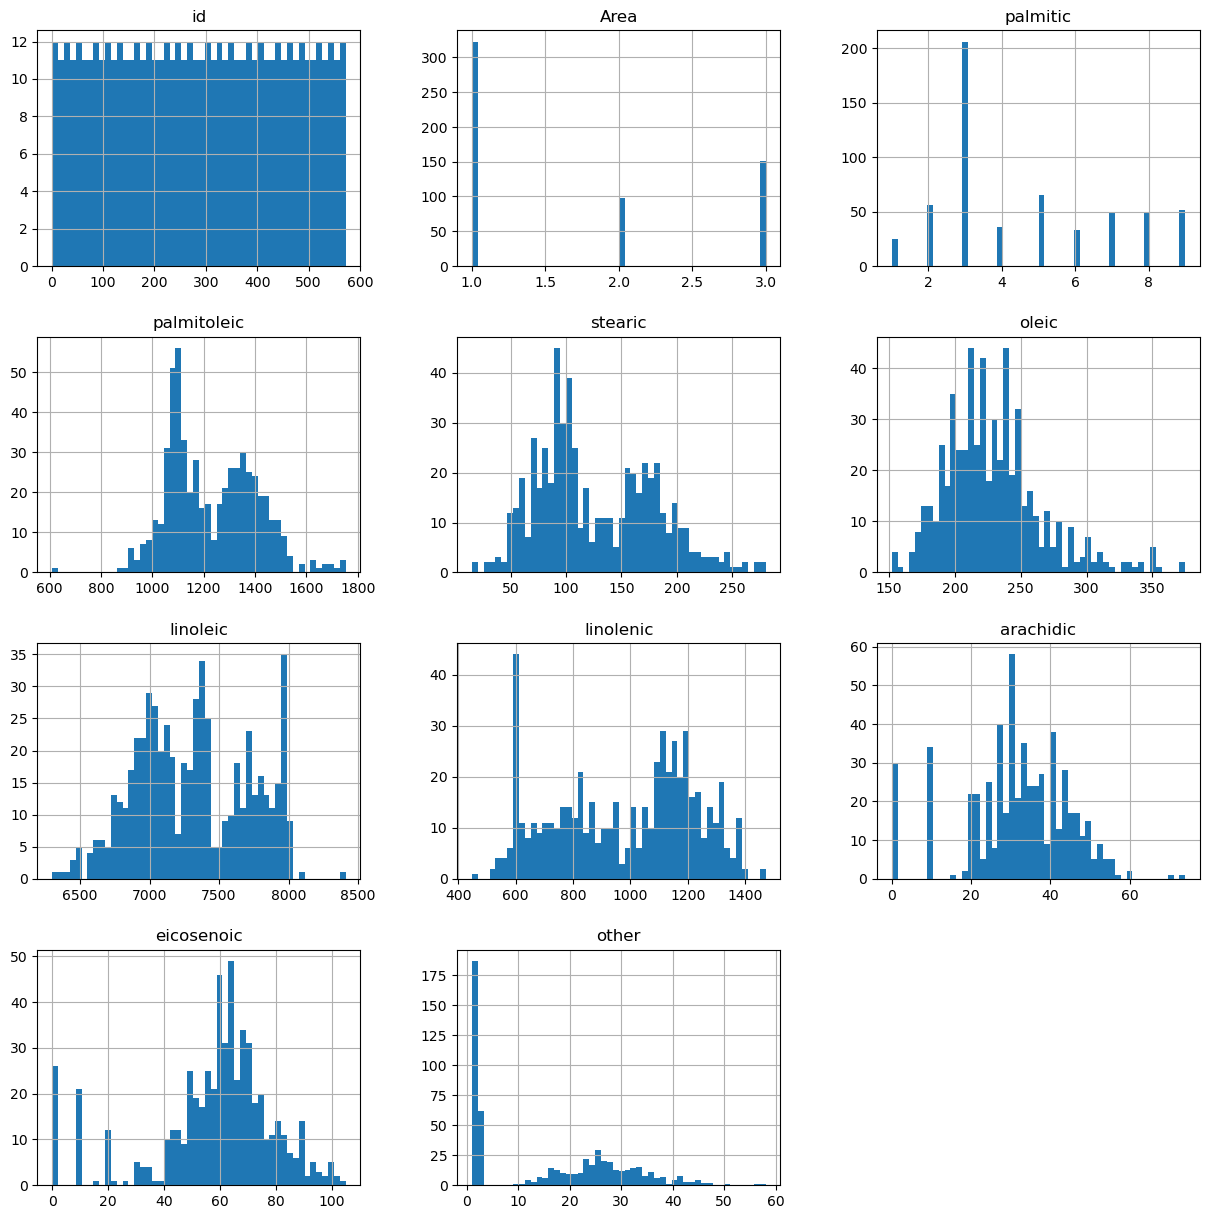

In [7]:
olive_data.hist(bins=50, figsize=(15,15))
plt.show()

C:\Users\Farhan Ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Farhan Ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Farhan Ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Farhan Ahmad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

<Figure size 640x480 with 0 Axes>

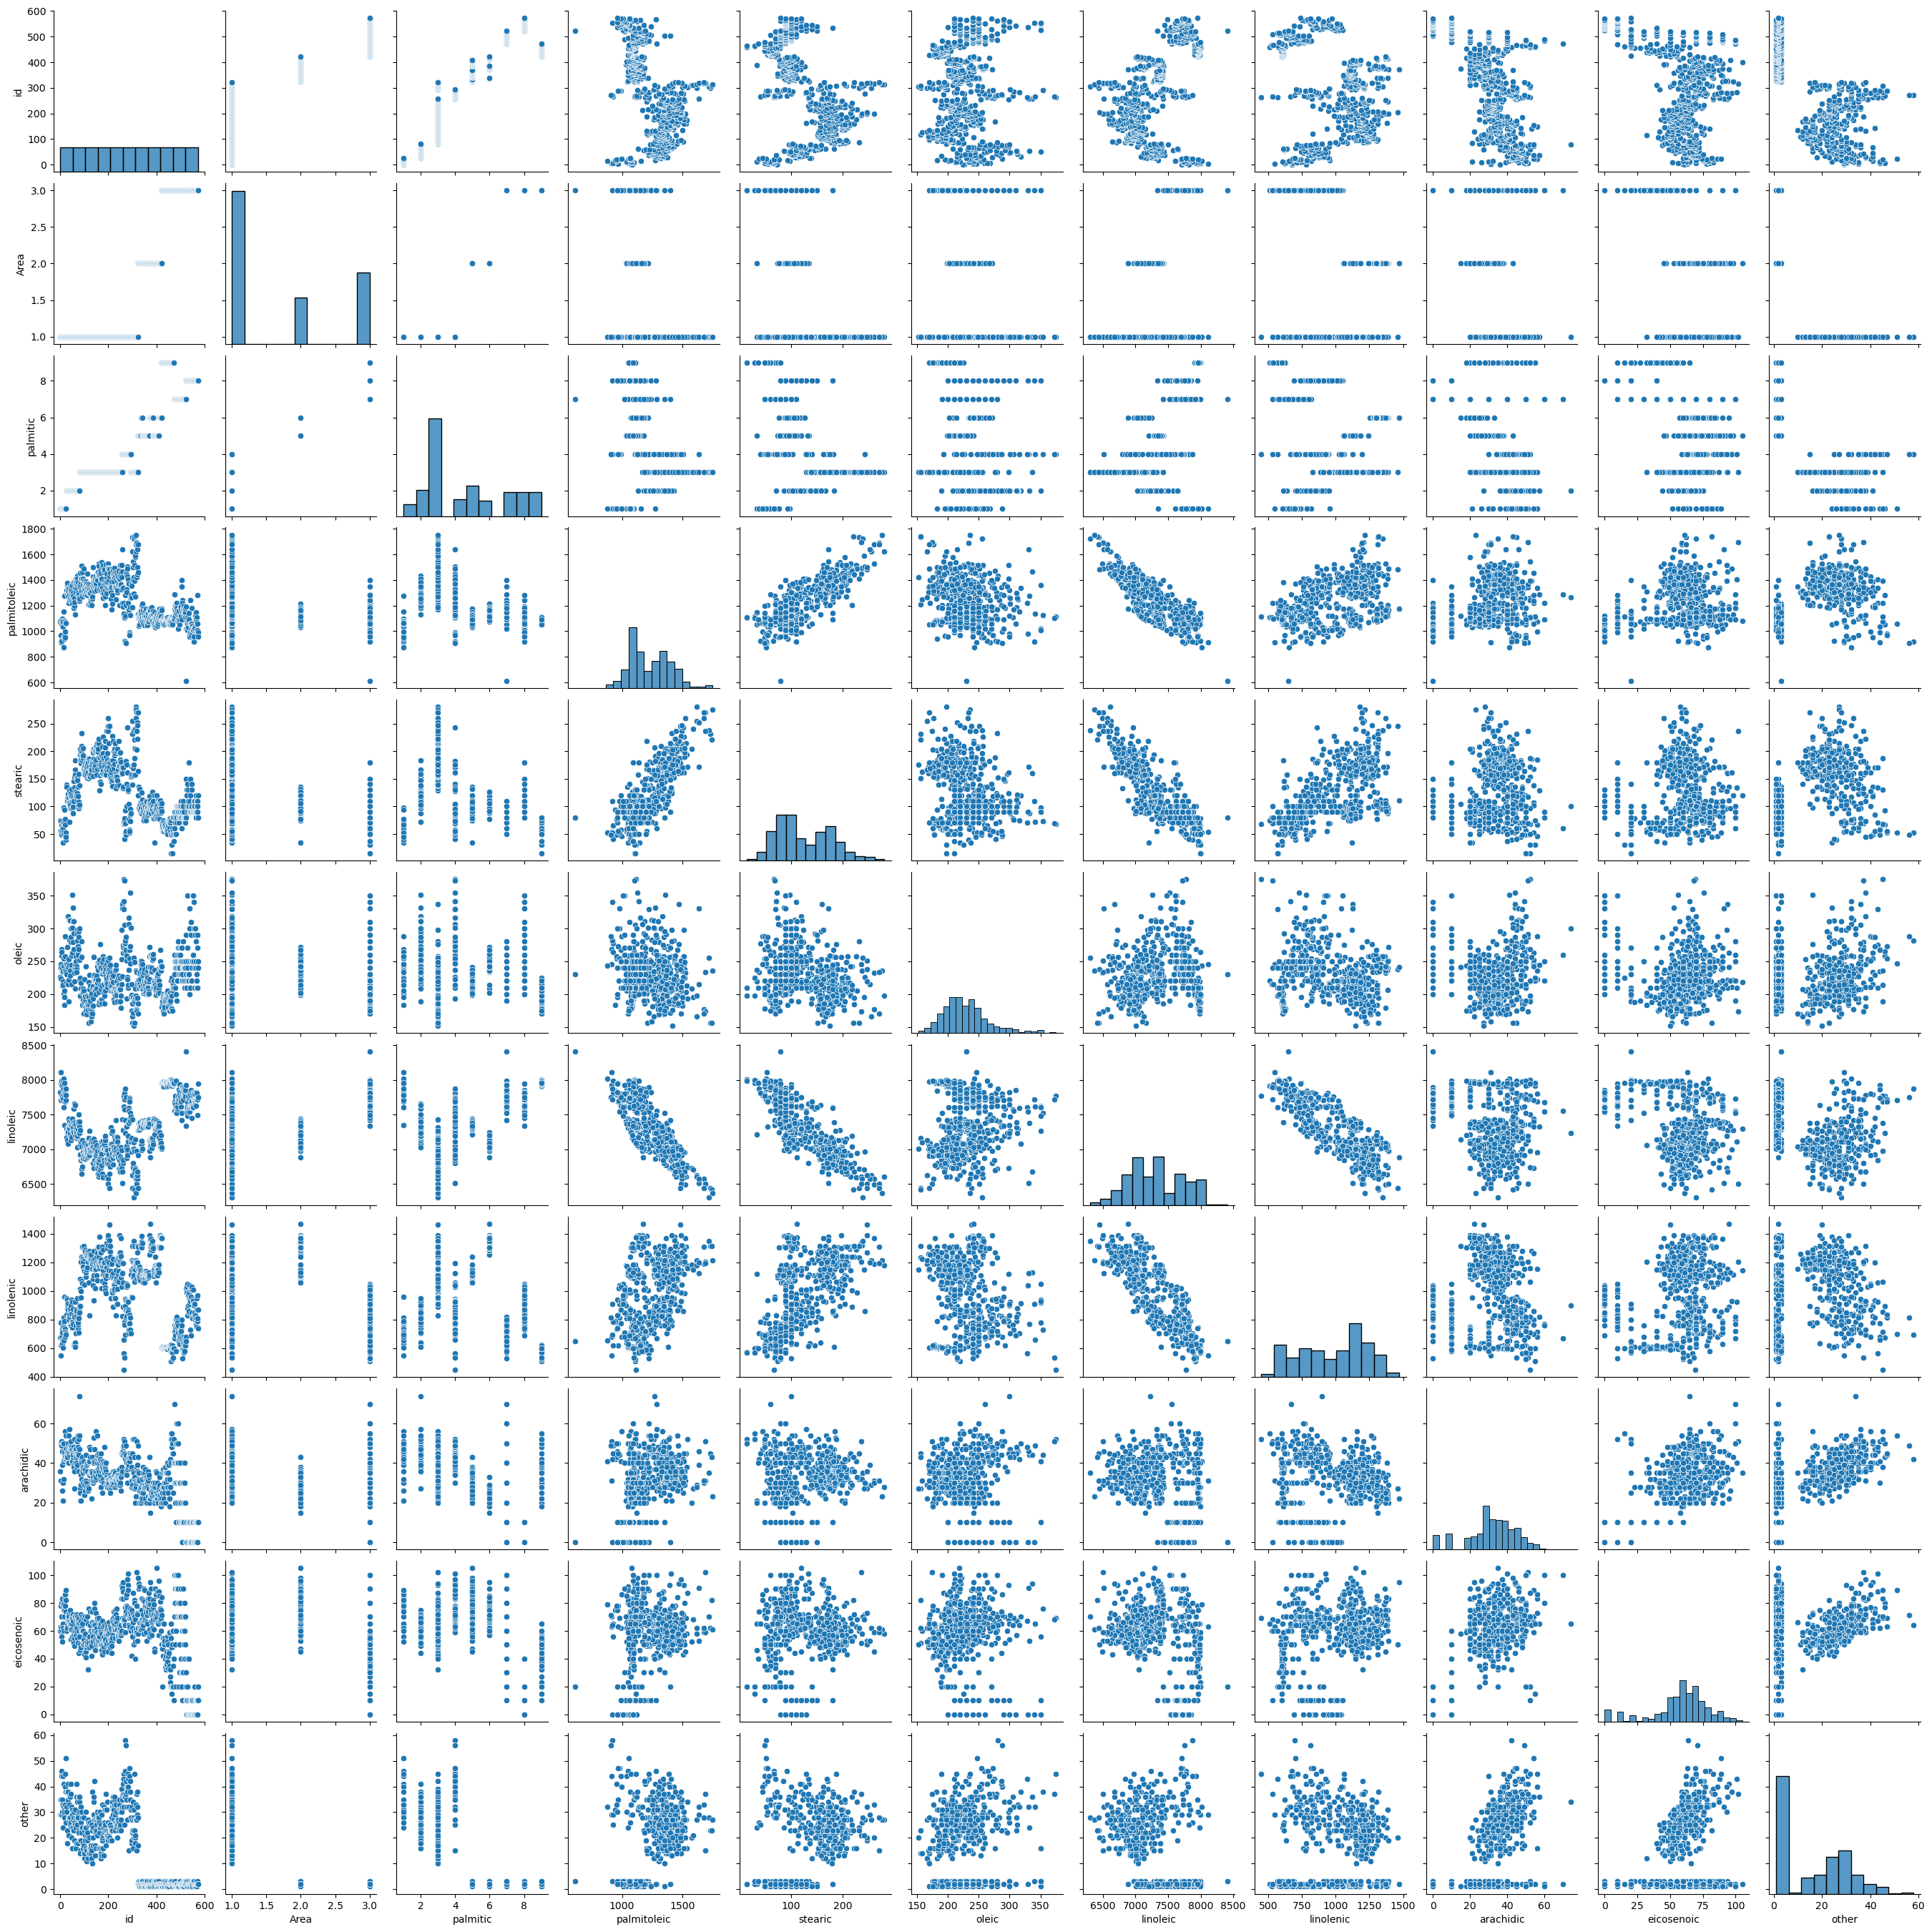

In [8]:
plt.figure()
sns.pairplot(olive_data, diag_kind='hist');

In [9]:
olive_data.loc[olive_data['Region'] == 'North-Apulia', 'Region'] = 'extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'South-Apulia', 'Region'] = 'extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'Calabria', 'Region'] = 'organic extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'Sicily', 'Region'] = 'organic extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'Inland-Sardinia', 'Region'] = 'extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'Coast-Sardinia', 'Region'] = 'extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'Umbria', 'Region'] = 'extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'East-Liguria', 'Region'] = 'extra virgin olive oil'
olive_data.loc[olive_data['Region'] == 'West-Liguria', 'Region'] = 'extra virgin olive oil'
print(len(olive_data))
print(olive_data['Region'].unique())

572
['extra virgin olive oil' 'organic extra virgin olive oil']


In [10]:
olive_data=olive_data.drop('id' , axis= 1)
olive_data=olive_data.drop('other' , axis= 1)
olive_data=olive_data.drop('Area' , axis= 1)
olive_data.head(2)
len(olive_data)

572

In [11]:
# divide the data : 
olive_data_organic = olive_data[olive_data['Region'] == 'organic extra virgin olive oil']
olive_data_extra = olive_data[olive_data['Region'] == 'extra virgin olive oil']

olive_data_organic.loc[olive_data_organic['Region'] == 'organic extra virgin olive oil', 'Region'] = 1

In [16]:
# Fit the Gaussian mixture model to the data : 
from sklearn.mixture import GaussianMixture
column_names = olive_data_organic.columns.tolist()

gmm = GaussianMixture(n_components=1) # we chose to have 1 container
gmm.fit(olive_data_organic) 

n_samples = len(olive_data_organic) / 2
generated_data = gmm.sample(n_samples)[0]
generated_data = pd.DataFrame(generated_data, columns=column_names)

# concatenate the generated data with your original dataset
olive_data_organic = pd.concat([olive_data_organic, generated_data])

olive_data_organic['Region'] = 'organic extra virgin olive oil'

ValueError: could not convert string to float: 'organic extra virgin olive oil'

In [17]:
# Reconcatinate the data : 
olive_data = pd.concat([olive_data_organic, olive_data_extra])
olive_data = olive_data.reset_index(drop=True)
olive_data.head(2)

,Region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,organic extra virgin olive oil,2.0,1315.0,139.0,230.0,7299.0,832.0,42.0,60.0
1,organic extra virgin olive oil,2.0,1321.0,136.0,217.0,7174.0,950.0,43.0,63.0


In [18]:
# specify your features and target variable
X = olive_data.drop('Region', axis=1)
y = olive_data['Region']

# split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_precision = pd.DataFrame(columns=['Algorithm', 'precision'])

In [19]:
#organic
nb_organic_train = math.floor((2 * len(olive_data_organic)) / 3)
nb_organic_test = 1 - nb_organic_train
olive_data_organic_train = olive_data_organic.sample(nb_organic_train)
random_indices_organic = olive_data_organic_train.index
olive_data_organic_test = olive_data_organic.drop(index=random_indices_organic)
olive_data_organic_train = olive_data_organic_train.reset_index(drop=True)
olive_data_organic_test = olive_data_organic_test.reset_index(drop=True)
olive_data_organic_train_features = olive_data_organic_train.copy()
olive_data_organic_train_features.drop('Region', axis=1)

olive_data_organic_test_features = olive_data_organic_test.copy()
olive_data_organic_test_features.drop('Region', axis=1)

olive_data_organic_train_Y = olive_data_organic_train_features['Region']
olive_data_organic_test_Y = olive_data_organic_test_features['Region']


#extra
nb_extra_train = math.floor((2 * len(olive_data_extra)) / 3)
nb_extra_test = 1 - nb_extra_train
olive_data_extra_train = olive_data_extra.sample(nb_extra_train)
random_indices_extra = olive_data_extra_train.index
olive_data_extra_test = olive_data_extra.drop(index=random_indices_extra)
olive_data_extra_train = olive_data_extra_train.reset_index(drop=True)
olive_data_extra_test = olive_data_extra_test.reset_index(drop=True)

olive_data_extra_train_features = olive_data_extra_train.copy()
olive_data_extra_train_features.drop('Region', axis=1)

olive_data_extra_test_features = olive_data_extra_test.copy()
olive_data_extra_test_features.drop('Region', axis=1)

olive_data_extra_train_Y = olive_data_extra_train_features['Region']
olive_data_extra_test_Y = olive_data_extra_test_features['Region']

olive_data_train_features = pd.concat([olive_data_extra_train_features, olive_data_organic_train_features])
olive_data_train_Y = pd.concat([olive_data_extra_train_Y, olive_data_organic_train_Y])

olive_data_test_features = pd.concat([olive_data_extra_test_features, olive_data_organic_test_features])
olive_data_test_Y = pd.concat([olive_data_extra_test_Y, olive_data_organic_test_Y])

In [23]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Assuming model_precision is already defined as a DataFrame
model_precision = model_precision.append({'Algorithm': 'Decision Tree', 'precision': accuracy}, ignore_index=True)

Accuracy: 0.9516129032258065


AttributeError: 'DataFrame' object has no attribute 'append'